<a href="https://colab.research.google.com/github/fwkhan/CE801/blob/master/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [5]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train[0].shape

(28, 28)

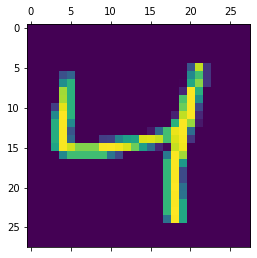

In [9]:
plt.matshow(X_train[2])

In [10]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [22]:
X_train_flattened.shape

(60000, 784)

In [23]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [24]:
X_test_flattened.shape

(10000, 784)

In [25]:
model = keras.Sequential([
      keras.layers.Dense(10, input_shape=(784,),
                            activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7313 - accuracy: 0.8100
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3133 - accuracy: 0.9135
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2736 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2642 - accuracy: 0.9263


In [27]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 945us/step - loss: 0.2657 - accuracy: 0.9265


[0.26570847630500793, 0.9265000224113464]

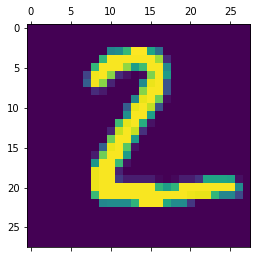

In [38]:
plt.matshow(X_test[1])

In [64]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

Adding Hiddel Layer


In [56]:
model = keras.Sequential([
      # Dense input layer first paramere - no. of neurons in next layer,
      # in this case it is the  hiddenlayer.  selected pseudorandom value 100,
      # keeping it less than the input shape of 784.                  
      keras.layers.Dense(100, input_shape=(784,), activation='relu'),
      # Dense Hidden layer, the first parameter is the number of output neurons.
      keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4584 - accuracy: 0.8714
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1356 - accuracy: 0.9605
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9842


In [65]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9777


[0.07950340211391449, 0.9776999950408936]

In [61]:
model = keras.Sequential([
      # Dense input layer first paramere - no. of neurons in next layer,
      # in this case it is the  hiddenlayer.  selected pseudorandom value 100,
      # keeping it less than the input shape of 784.                  
      keras.layers.Dense(250, input_shape=(784,), activation='relu'),
      keras.layers.Dense(200, input_shape=(784,), activation='relu'),
      # Dense Hidden layer, the first parameter is the number of output neurons.
      keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3474 - accuracy: 0.8966
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0917 - accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0570 - accuracy: 0.9815
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0388 - accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0311 - accuracy: 0.9901


In [66]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9777


[0.07950340211391449, 0.9776999950408936]

Text(69.0, 0.5, 'Truth')

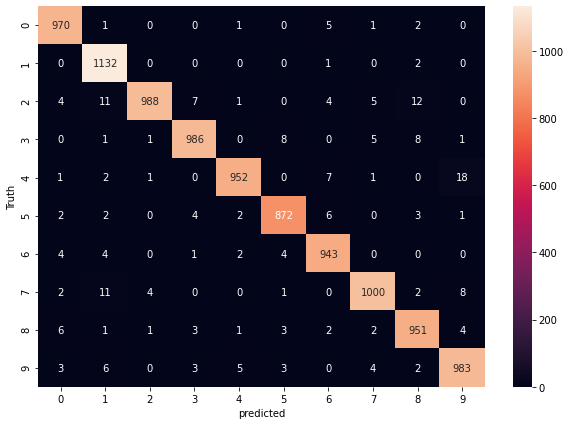

In [67]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [68]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      # Dense input layer first paramere - no. of neurons in next layer,
      # in this case it is the  hiddenlayer.  selected pseudorandom value 100,
      # keeping it less than the input shape of 784.                  
      keras.layers.Dense(100, activation='relu'),
      # Dense Hidden layer, the first parameter is the number of output neurons.
      keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4482 - accuracy: 0.8762
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0831 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0631 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0511 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0398 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0312 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0254 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0206 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

Text(69.0, 0.5, 'Truth')

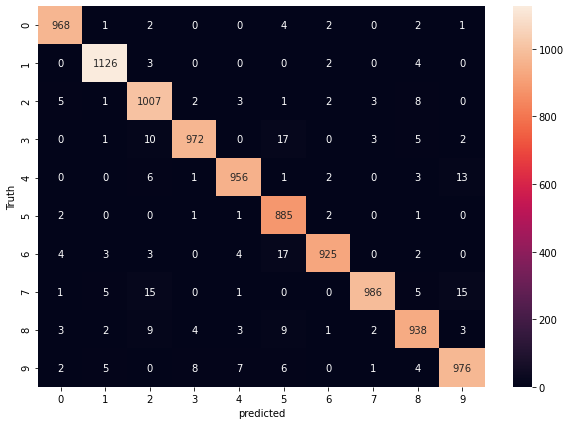

In [69]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')